In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)
from root_pandas import read_root

choose a specific side, subdetector, and layer

In [2]:
zside = 1
subdet = 3
layer = 4

read in features from geometry ntuple files and flatten with root_pandas

In [3]:
features = ['id', 'zside', 'subdet','layer', 'module', 'x', 'y', 'z', 'tc_layer',
            'tc_zside', 'tc_subdet', 'tc_id', 'tc_x', 'tc_y', 'tc_z']

df_old = read_root('../data/test_triggergeom.root', 'hgcaltriggergeomtester/TreeModules', 
                    columns=features, flatten=features)

df_new = read_root('../data/test_triggergeom_newmap.root', 'hgcaltriggergeomtester/TreeModules', 
                    columns=features, flatten=features)

let's see the dataframe columns

In [4]:
df_old.head()

,id,zside,subdet,layer,module,x,y,z,tc_layer,tc_zside,tc_subdet,tc_id,tc_x,tc_y,tc_z,__array_index
0,1749853695,-1,4,9,165,-26.737783,56.236221,-393.77243,9,-1,4,1749836844,-51.166821,74.015259,-393.775024,0
1,1749853695,-1,4,9,165,-26.737783,56.236221,-393.77243,9,-1,4,1749836836,-49.011440,78.073120,-393.775024,1
2,1749853695,-1,4,9,165,-26.737783,56.236221,-393.77243,9,-1,4,1749836840,-49.929821,75.963036,-393.775024,2
3,1749853695,-1,4,9,165,-26.737783,56.236221,-393.77243,9,-1,4,1749836837,-47.793182,75.963036,-393.775024,3
4,1749853695,-1,4,9,165,-26.737783,56.236221,-393.77243,9,-1,4,1749836841,-49.030178,74.015266,-393.775024,4


cut the dataframes to select only the specified layer

In [5]:
old_15 = df_old.query('zside == 1 and layer == 15 and subdet == 3')
new_15 = df_new.query('zside == 1 and layer == 15 and subdet == 3')

loop over motherboards ('id' field) and plot color-coded trigger cell locations

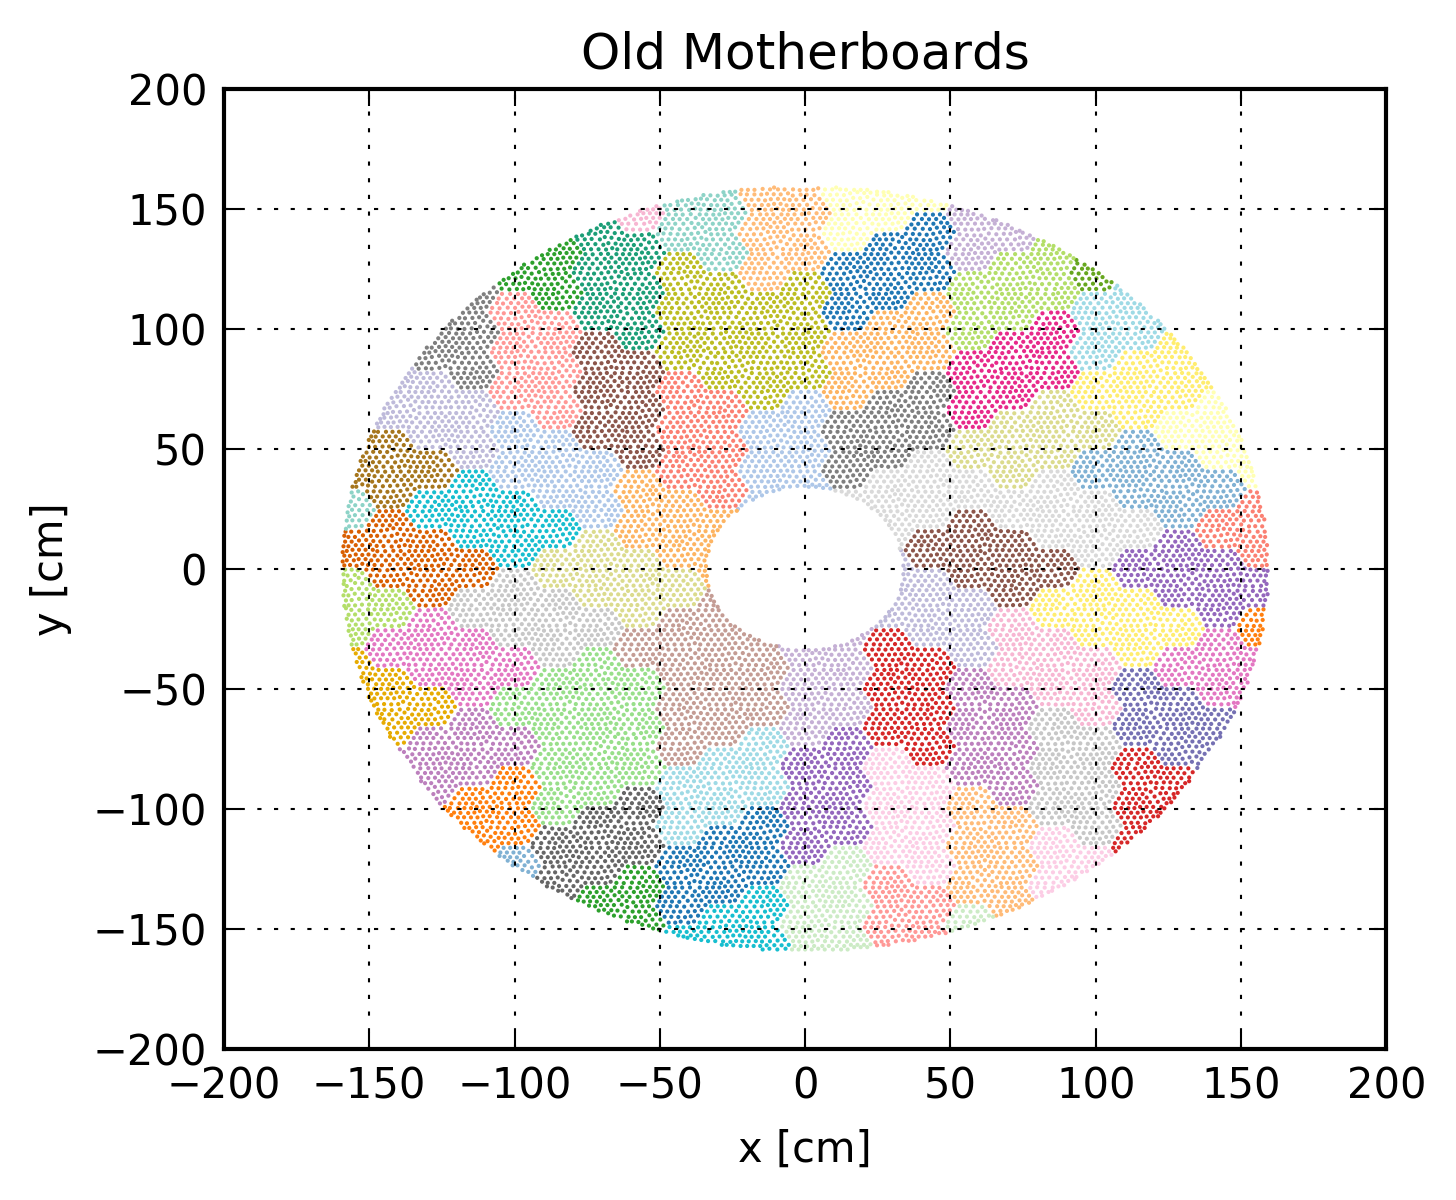

In [8]:
plt.figure(figsize=(5,4))
plt.grid()
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

colors = [cm.get_cmap('Vega20')(i) for i in range(20)]
colors.extend([cm.get_cmap('Set3')(i) for i in range(12)])
colors.extend([cm.get_cmap('Dark2')(i) for i in range(8)])

groupby = old_15.groupby('id')
for i, key in enumerate(list(groupby.groups.keys())):
    this_group = groupby.get_group(key)
    plt.scatter(this_group.tc_x, this_group.tc_y, s=1, edgecolors="None", color=colors[i%len(colors)]);
plt.title('Old Motherboards');

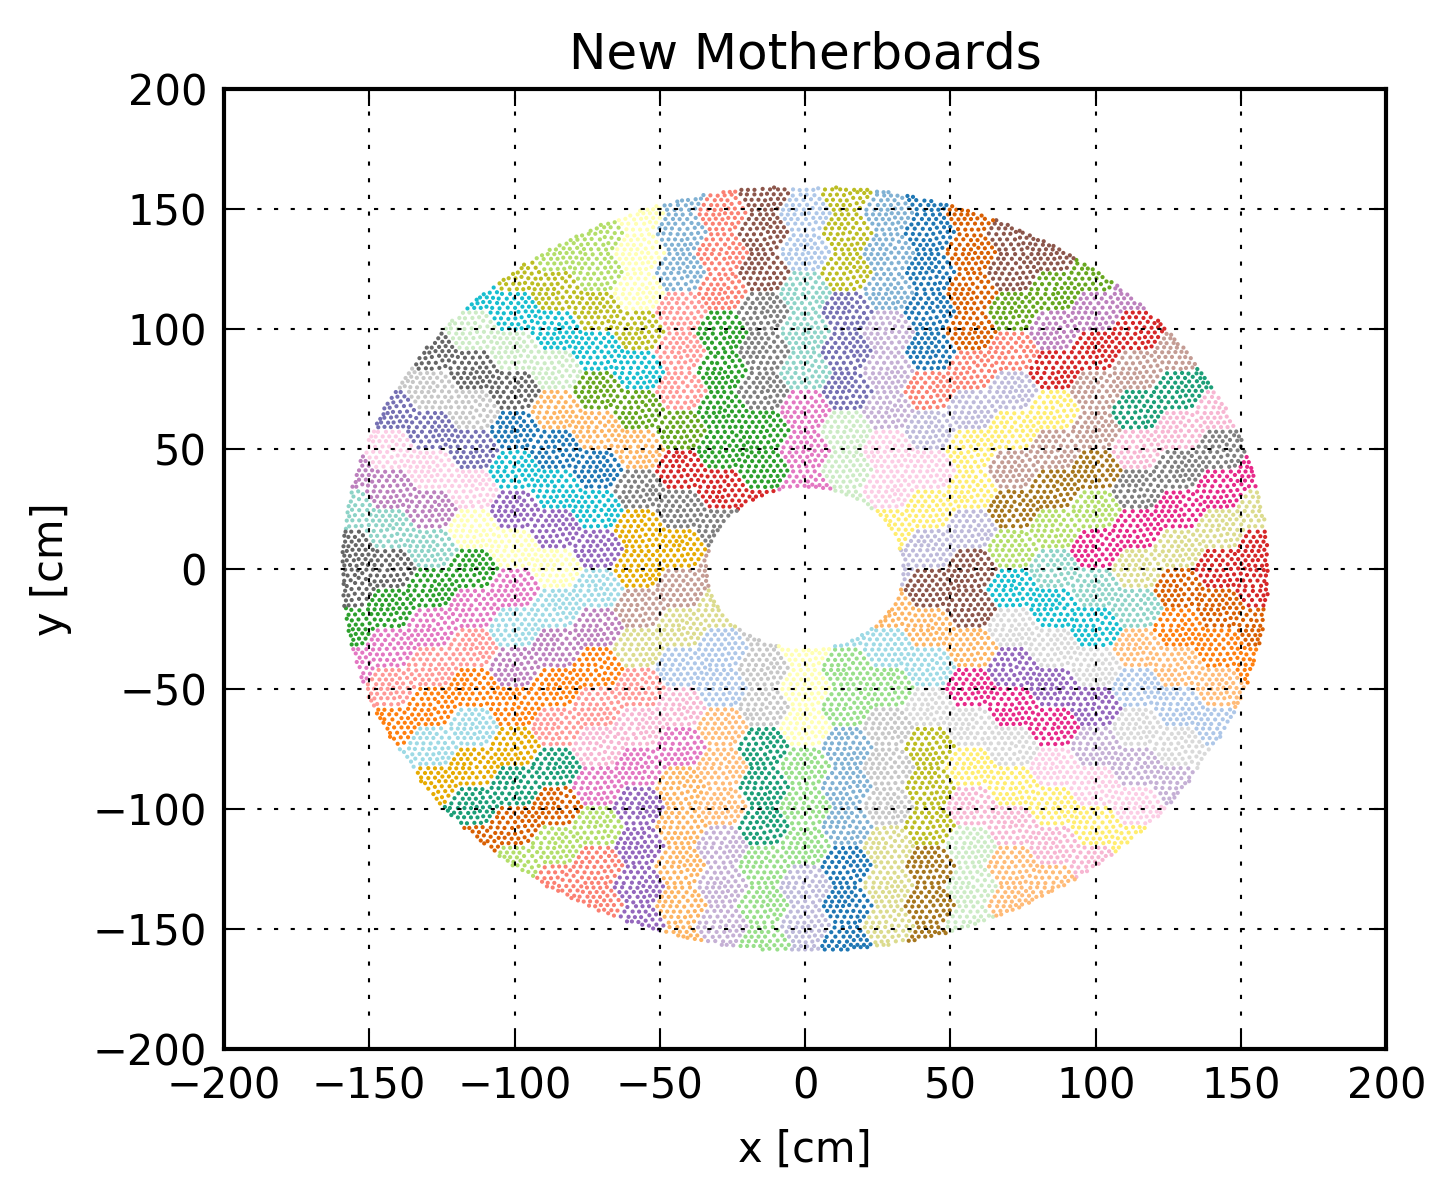

In [9]:
plt.figure(figsize=(5,4))
plt.grid()
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

colors = [cm.get_cmap('Vega20')(i) for i in range(20)]
colors.extend([cm.get_cmap('Set3')(i) for i in range(12)])
colors.extend([cm.get_cmap('Dark2')(i) for i in range(8)])
groupby = new_15.groupby('id')
for i, key in enumerate(list(groupby.groups.keys())):
    this_group = groupby.get_group(key)
    plt.scatter(this_group.tc_x, this_group.tc_y, s=1, edgecolors="None", color=colors[i%len(colors)]);
plt.title('New Motherboards');